In [1]:
import numpy as np
from scipy.stats.stats import pearsonr
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time

from os.path import exists

/opt/python/2.7.10/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
def get_SN(outputsumfreq):
    noise_std = np.std(outputsumfreq[:5]) 
    noise_mean = np.mean(outputsumfreq[:5])
    sigs_noise = (outputsumfreq-noise_mean)/noise_std
    return sigs_noise

def load_gp(time_string,nchan):
    
    gp1 = np.load('/home/ramain/GPs/GPef/p{}.npy'.format(time_string))
    gp1t = np.fft.irfft(gp1,axis=1)
    gp1s = gp1t.reshape(-1,2*nchan,16)
    gp1s = np.fft.rfft(gp1s,axis=1)
    dchan = gp1s
    dR = np.concatenate((dchan[:,::-1,8], dchan[...,0], dchan[:,::-1,10], dchan[...,2], dchan[:,::-1,12], dchan[...,4], dchan[:,::-1,14], dchan[...,6]), axis=1)
    dL = np.concatenate((dchan[:,::-1,9], dchan[...,1], dchan[:,::-1,11], dchan[...,3], dchan[:,::-1,13], dchan[...,5], dchan[:,::-1,15], dchan[...,7]), axis=1)
    output = (abs(dR)**2 + abs(dL)**2).T


    outputsumfreq = output.sum(0) #dedispersed
    #computes signal to noise after summing all the frequencies
    sigs_noise = get_SN(outputsumfreq)
    S_N = max(sigs_noise)

    peak_time = np.argmax(sigs_noise)
    
    background_freq = output[:,peak_time-3]
    
    output_pulse = output[:,peak_time]

    freq_spec = output_pulse
    
    return freq_spec



In [2]:
time_string1 = '2015-10-19T00:17:47.415' # S/N = 89!, main pulse 
time_string2 = '2015-10-19T02:35:26.143' # S/N = 43, main pulse 
time_string3 = '2015-10-19T02:06:52.280' #S/N = 7.9, inter pulse
time_string4 = '2015-10-19T02:06:58.031' #S/N = 9.6, main pulse

time_string5 = '2015-10-19T00:54:59.880' # bright double pulse
time_string6 = '2015-10-19T02:36:46.815'  #bright double pulse2

In [16]:
time_string = time_string5
gp1 = np.load('/home/ramain/GPs/GP{}/p{}.npy'.format('p1',time_string))
# gp2 = np.load('/home/ramain/GPs/GP{}/p{}.npy'.format('jb',time_string1))

In [4]:
%pylab inline
gp1.dtype

Populating the interactive namespace from numpy and matplotlib


dtype('complex128')

In [7]:
gp1.shape

(64, 129, 16)

dtype('float64')

In [32]:
gp1t = np.fft.irfft(gp1,axis=1)
nchan = 32
gp1s = gp1t.reshape(-1,2*nchan,16)
gp1s = np.fft.rfft(gp1s,axis=1)
gp1s.shape

(256, 33, 16)

In [33]:
# dchan = np.fft.rfft(d_dedispersed.reshape(-1, 2*nchan, 16), axis=1)
dchan = gp1
dR = np.concatenate((dchan[:,::-1,8], dchan[...,0], dchan[:,::-1,10], dchan[...,2], dchan[:,::-1,12], dchan[...,4], dchan[:,::-1,14], dchan[...,6]), axis=1)
dL = np.concatenate((dchan[:,::-1,9], dchan[...,1], dchan[:,::-1,11], dchan[...,3], dchan[:,::-1,13], dchan[...,5], dchan[:,::-1,15], dchan[...,7]), axis=1)
output = (abs(dR)**2 + abs(dL)**2).T



Populating the interactive namespace from numpy and matplotlib


(1032, 64)

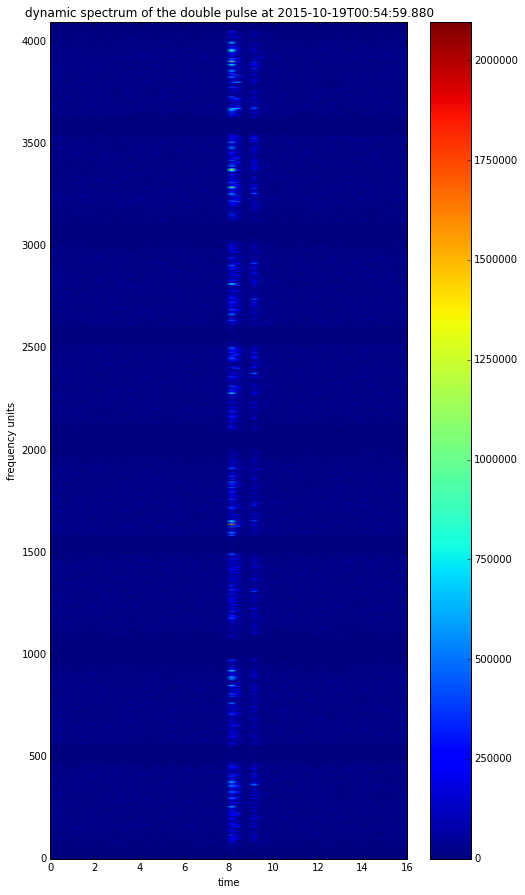

In [31]:
%pylab inline
nchan = 512
figure(figsize = (8,15))
imshow(output,extent = [0,64*128/nchan,0,nchan*8],aspect = 'auto')
# title('bright pulse)
xlabel('time')
ylabel('frequency units')
colorbar()
title('dynamic spectrum of the double pulse at {}'.format(time_string))
output.shape

[54  0 29  8 51 58 25 45 42 23  2 44 22 17  3 53 16 18 48 10  7 13 20 46 52
 11 24  9  1 57 28 19 43  4 14 27 30 31 50 56 49 61 41 62 63 59  6 12 26 21
 47 55  5 40 15 60 39 38 35 34 37 36 33 32]


/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(20, 50)

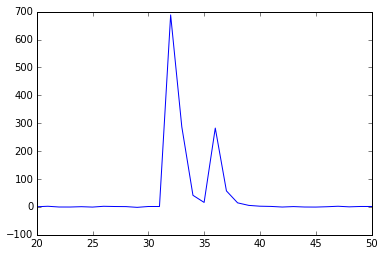

In [34]:
def get_SN(outputsumfreq):
    noise_std = np.std(outputsumfreq[:5]) 
    noise_mean = np.mean(outputsumfreq[:5])
    sigs_noise = (outputsumfreq-noise_mean)/noise_std
    return sigs_noise

outputsumfreq = output.sum(0) #dedispersed
#computes signal to noise after summing all the frequencies
sigs_noise = get_SN(outputsumfreq)
S_N = max(sigs_noise)

sn_sorted = np.argsort(sigs_noise)
print sn_sorted
peak_time1 = np.argmax(sigs_noise)
# peak_time2 = np.argmax()
# print peak_time

background_freq = output[:,sn_sorted[15]]

output_pulse1 = output[:,32]-background_freq
output_pulse2 = output[:,36]-background_freq

background_std = []
for j in range(8):
    background_std.append(background_freq[j*(nchan+1)+50./512*nchan:j*(nchan+1)+460./512*nchan].std())

plot(sigs_noise)
xlim(20,50)

/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


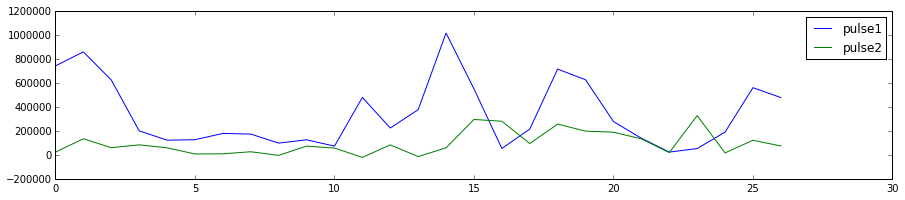

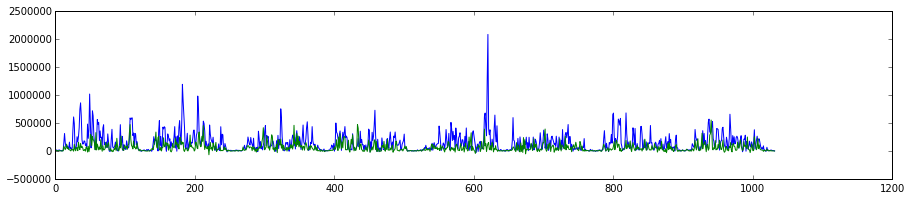

In [35]:
figure(figsize=(15,3))
i = 1
op1 = output_pulse1[i*(nchan+1)+40./512*nchan:i*(nchan+1)+465./512*nchan]
op2 = output_pulse2[i*(nchan+1)+40./512*nchan:i*(nchan+1)+465./512*nchan]
plot(op1,label = 'pulse1')
plot(op2,label = 'pulse2')
# plot(background_freq[40./512*nchan:465./512*nchan],label = 'bg')
legend()

figure(figsize = (15,3))
plot(output_pulse1)
plot(output_pulse2)




background std is: [7199.9498324959404, 11008.314650580482, 11046.876270103056, 10693.936137795577, 12655.696173455348, 12988.333296309638, 17779.351086748196, 7022.7732554968497]
pulse 1 std is: [ 159040.90563051  272028.1662453   137427.60986272  201538.66291623
  164127.45793577  283532.68205466  222688.56211231  111024.2495844 ]
pulse 2 std is: [  35242.14309147  100186.10281715   57915.46211363  108628.3708965
   91090.35166534   71702.28632645  111569.29955203   21490.8627841 ]
0.213905815788 [0.31575780925280439, 0.15319863108120313, 0.011344174280922006, 0.59823181118659152, 0.19512569407701341, 0.12644394681925794, 0.36034788394997852, -0.04920342434226193]


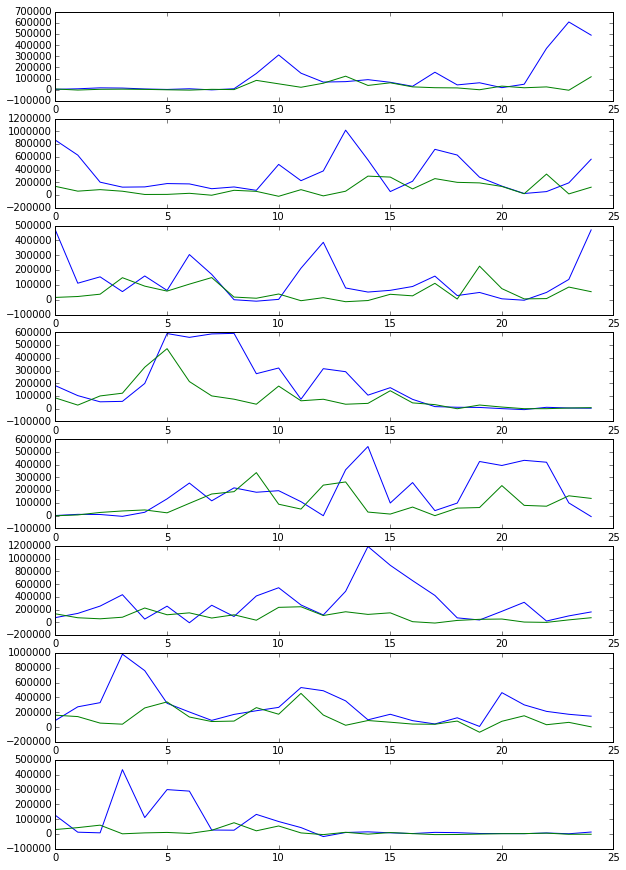

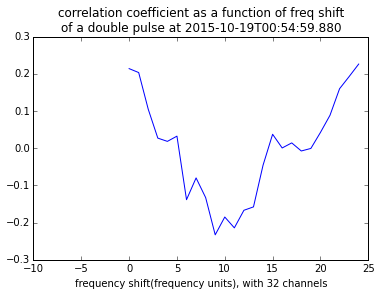

In [36]:
def get_cc((fs1,bgstd1),(fs2,bgstd2)):
    mean1 = np.mean(fs1)
    mean2 = np.mean(fs2)
    numerator = np.mean((fs1-mean1)*(fs2-mean2))
    denominator = np.sqrt(((np.std(fs1))**2-bgstd1**2)*((np.std(fs2))**2-bgstd2**2))
#     denominator = np.std(fs1)*np.std(fs2)
    return numerator/denominator
    
def get_ccs((fs1,bgstd1),(fs2,bgstd2)):
    coefficients= []
    for i in range(8):
        X = fs1[i]
        Y = fs2[i]
        Xbg = bgstd1[i]
        Ybg = bgstd2[i]
        coefficient = get_cc((X,Xbg),(Y,Ybg))
        coefficients.append(coefficient) 
    return np.mean(coefficients),coefficients

def process_freq_spec(gp1,nchan,index=None,draw=0):
    '''function takes a continuous frequency spectrum and cuts it into 8 bands, divide by the giant pulse mean, and normalize it by itself gp1=freq_spec[i]. function also plots the frequency spectrum'''
    gp1_8=np.array([gp1[int(50./512*nchan):int(460./512*nchan)]])
    for j in range(7):gp1_8=np.append(gp1_8,np.array([gp1[(j+1)*(nchan+1)+int(50./512*nchan):(j+1)*(nchan+1)+int(460./512*nchan)]]),0)
    if nchan == 512:
        new1 = np.zeros((8,25))
        for i in range(8):
            for j in range(25):
                new1[i,j] = average(gp1_8[i,j*16:j*16+16])
        return new1
    if draw:
        f,axarr=plt.subplots(8,1,figsize=(10,15))
        for i in range(8):axarr[i].plot(gp1_8[i])
        axarr[0].set_title('Frequency spectrum of giant pulse at {}'.format(time_values[index]))
    return gp1_8

op1_8 = process_freq_spec(output_pulse1,nchan)
op2_8 = process_freq_spec(output_pulse2,nchan)

print 'background std is:', background_std
print 'pulse 1 std is:', np.std(op1_8,axis = 1)
print 'pulse 2 std is:', np.std(op2_8,axis = 1)

cc,ccs = get_ccs((op1_8,background_std),(op2_8,background_std))
print cc,ccs

f,axarr=plt.subplots(8,1,figsize=(10,15))
for i in range(8):
    axarr[i].plot(op1_8[i])
    axarr[i].plot(op2_8[i])
    
cc_dfs = []
for k in range(op1_8.shape[1]):
    cc,ccs = get_ccs(((np.roll(op1_8,k,axis =1)),background_std),(op2_8,background_std))
    cc_dfs.append(cc)
    
figure()
plot(cc_dfs)
xlabel('frequency shift(frequency units), with {} channels'.format(nchan))
xlim(-10,len(cc_dfs))
title('correlation coefficient as a function of freq shift \nof a double pulse at {}'.format(time_string))